In [1]:
import numpy as np              # Operações matemáticas e arrays numéricos
import pandas as pd             # Manipulação e análise de dados (DataFrames)
import matplotlib.pyplot as plt # Criação de gráficos
import seaborn as sns           # Visualizações estatísticas 

from sklearn.pipeline import Pipeline  
# Permite encadear etapas (pré-processamento + modelo) em um único fluxo

from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
# StandardScaler -> Padroniza variáveis numéricas (média 0, desvio 1)
# OneHotEncoder -> Converte variáveis categóricas em variáveis binárias (0/1)
# FunctionTransformer -> Aplica funções personalizadas dentro do pipeline

from sklearn.compose import ColumnTransformer
# Aplica transformações diferentes para colunas numéricas e categóricas

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
# train_test_split -> Divide os dados em treino e teste
# StratifiedKFold -> Validação cruzada mantendo proporção das classes
# cross_validate -> Avalia modelo com múltiplas métricas via validação cruzada

from sklearn.linear_model import LogisticRegression
# Modelo linear para classificação binária (base probabilística)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# RandomForest -> Conjunto de árvores de decisão (reduz overfitting)
# GradientBoosting -> Modelo sequencial que melhora erros anteriores

from sklearn.svm import SVC
# Support Vector Machine para classificação com margens máximas

from sklearn.metrics import (
    accuracy_score,        # Proporção de acertos totais
    f1_score,              # Média harmônica entre precisão e recall
    log_loss,              # Mede qualidade das probabilidades previstas
    classification_report, # Relatório completo (precisão, recall, F1)
    confusion_matrix,      # Matriz de acertos e erros por classe
    RocCurveDisplay        # Gera gráfico da curva ROC
)



### Introdução ao problema

Este trabalho utiliza o dataset do Kaggle – Salary Prediction Classification[https://www.kaggle.com/datasets/ayessa/salary-prediction-classification/data], com informações socioeconômicas e demográficas de indivíduos, para prever se uma pessoa pertence à faixa de renda >50K. 

O modelo desenvolvido, em um cenário real de um banco, permite identificar clientes com alta renda e direcionar produtos exclusivos apenas para quem tem perfil >50K, aumentando a eficiência e reduzindo custos. Além disso, ajuda na gestão de risco de crédito, prevenindo inadimplência e permitindo aprovações automáticas de limites com base na renda prevista. Por fim, possibilita personalizar a experiência do cliente, oferecendo produtos no momento certo e evitando que clientes valiosos migrem para a concorrência, fortalecendo retenção e oportunidades de cross-selling.

### Leitura dos dados

In [2]:
df = pd.read_csv("salary.csv")

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# Criando a tabela descritiva
descricao_variaveis = pd.DataFrame({
    "Variável": [
        "age", "workclass", "fnlwgt", "education", "education-num",
        "marital-status", "occupation", "relationship", "race",
        "sex", "capital-gain", "capital-loss",
        "hours-per-week", "native-country", "salary"
    ],
    
    "Nome em Português": [
        "Idade", "Tipo de Trabalho", "Peso Amostral", "Escolaridade",
        "Anos de Estudo", "Estado Civil", "Ocupação",
        "Relação Familiar", "Raça", "Sexo",
        "Ganho de Capital", "Perda de Capital",
        "Horas Trabalhadas por Semana",
        "País de Origem", "Renda"
    ],
    
    "Tipo": [
        "Numérica (Inteiro)", "Categórica", "Numérica (Inteiro)",
        "Categórica", "Numérica (Inteiro)",
        "Categórica", "Categórica",
        "Categórica", "Categórica", "Binária",
        "Numérica (Inteiro)", "Numérica (Inteiro)",
        "Numérica (Inteiro)", "Categórica", "Binária"
    ],
    
    "Descrição": [
        "Idade do indivíduo",
        "Tipo de vínculo empregatício",
        "Peso final da amostra (amostragem do censo)",
        "Nível de escolaridade",
        "Quantidade de anos de estudo",
        "Estado civil do indivíduo",
        "Tipo de ocupação/profissão",
        "Relação familiar no domicílio",
        "Raça declarada",
        "Sexo do indivíduo",
        "Ganho anual de capital",
        "Perda anual de capital",
        "Número de horas trabalhadas por semana",
        "País de origem",
        "Faixa de renda anual (<=50K ou >50K)"
    ]
})

In [5]:
descricao_variaveis


,Variável,Nome em Português,Tipo,Descrição
0,age,Idade,Numérica (Inteiro),Idade do indivíduo
1,workclass,Tipo de Trabalho,Categórica,Tipo de vínculo empregatício
2,fnlwgt,Peso Amostral,Numérica (Inteiro),Peso final da amostra (amostragem do censo)
3,education,Escolaridade,Categórica,Nível de escolaridade
4,education-num,Anos de Estudo,Numérica (Inteiro),Quantidade de anos de estudo
5,marital-status,Estado Civil,Categórica,Estado civil do indivíduo
6,occupation,Ocupação,Categórica,Tipo de ocupação/profissão
7,relationship,Relação Familiar,Categórica,Relação familiar no domicílio
8,race,Raça,Categórica,Raça declarada
9,sex,Sexo,Binária,Sexo do indivíduo


### Limpeza dos dados

In [6]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' 

In [7]:
# Removendo os espações
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()
    
# Definindo ? como NA
df = df.replace("?", np.nan)

# Percentual NA
(df.isna().sum() / len(df)) * 100

# Percentual pequeno - remover NAs
df = df.dropna()
df.isna().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [8]:
# Redundancias: education e education-num

df = df.drop(columns=["education-num"])

In [9]:
contagem_salary = df["salary"].value_counts().reset_index()
contagem_salary.columns = ["Salário", "Quantidade"]

contagem_salary

,Salário,Quantidade
0,<=50K,22654
1,>50K,7508


In [10]:
contagem_paises = df["native-country"].value_counts().reset_index()
contagem_paises.columns = ["País", "Quantidade"]

contagem_paises


,País,Quantidade
0,United-States,27504
1,Mexico,610
2,Philippines,188
3,Germany,128
4,Puerto-Rico,109
5,Canada,107
6,El-Salvador,100
7,India,100
8,Cuba,92
9,England,86


In [11]:
# Maioria EUA - Agrupar em EUA e outros

df["native-country"] = df["native-country"].apply(
    lambda x: "EUA" if x == "United-States" else "Outros"
)

contagem_paises = df["native-country"].value_counts().reset_index()
contagem_paises.columns = ["País", "Quantidade"]

contagem_paises

,País,Quantidade
0,EUA,27504
1,Outros,2658


### EDA

In [12]:
cat_cols = df.select_dtypes(include="object").columns

def tabela_contagem_percentual(coluna):
    tabela = df[coluna].value_counts().reset_index()
    tabela.columns = ["Categoria", "Contagem"]
    
    tabela["Percentual (%)"] = (
        tabela["Contagem"] / tabela["Contagem"].sum() * 100
    ).round(2)
    
    return tabela

for col in cat_cols:
    print(f"\n===== {col} =====")
    print(tabela_contagem_percentual(col))



===== workclass =====
          Categoria  Contagem  Percentual (%)
0           Private     22286           73.89
1  Self-emp-not-inc      2499            8.29
2         Local-gov      2067            6.85
3         State-gov      1279            4.24
4      Self-emp-inc      1074            3.56
5       Federal-gov       943            3.13
6       Without-pay        14            0.05

===== education =====
       Categoria  Contagem  Percentual (%)
0        HS-grad      9840           32.62
1   Some-college      6678           22.14
2      Bachelors      5044           16.72
3        Masters      1627            5.39
4      Assoc-voc      1307            4.33
5           11th      1048            3.47
6     Assoc-acdm      1008            3.34
7           10th       820            2.72
8        7th-8th       557            1.85
9    Prof-school       542            1.80
10           9th       455            1.51
11          12th       377            1.25
12     Doctorate       375 

Utilizaram-se gráficos de proporção para as variáveis categóricas, permitindo comparar os grupos de forma mais justa, independentemente do tamanho de cada categoria.

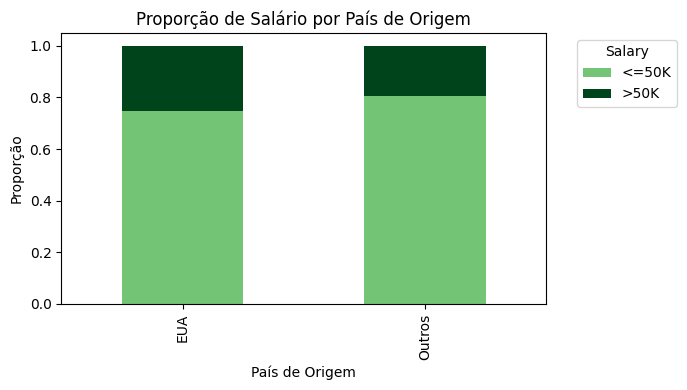

In [13]:
prop_country = pd.crosstab(
    df["native-country"],
    df["salary"],
    normalize="index"
)

ax = prop_country.plot(
    kind="bar",
    stacked=True,
    figsize=(7,4),
    color=["#74c476", "#00441b"] # verde claro e verde escuro
)

# mover legenda para fora
plt.legend(title="Salary", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.title("Proporção de Salário por País de Origem")
plt.ylabel("Proporção")
plt.xlabel("País de Origem")

plt.tight_layout()
plt.show()




Nota-se que a maioria da população em ambos os grupos receba até 50K, mas os Estados Unidos apresenta uma maior proporção de indivíduos ganhando  mais que 50K em comparação aos outros países.

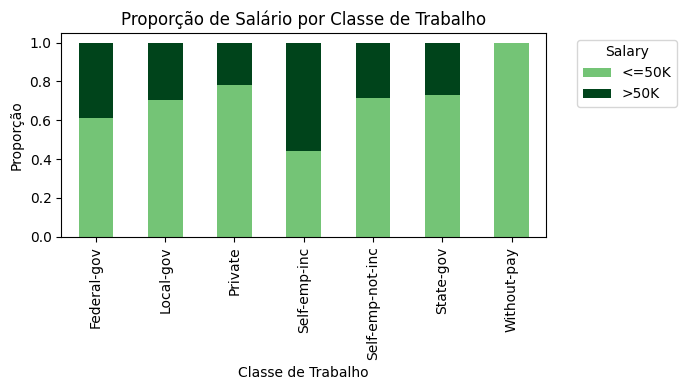

In [14]:
prop_workclass = pd.crosstab(df["workclass"], df["salary"], normalize="index")
    
ax = prop_workclass.plot(
    kind="bar",
    stacked=True,
    figsize=(7,4),
    color=["#74c476", "#00441b"] # verde claro e verde escuro
)  
# mover legenda para fora
plt.legend(title="Salary", bbox_to_anchor=(1.05, 1), loc="upper left")
    
plt.title(f"Proporção de Salário por Classe de Trabalho")
plt.ylabel("Proporção")
plt.xlabel("Classe de Trabalho")
plt.tight_layout()
plt.show()

Analisando a proporção de salário por classe de trabalho observa-se que o Self-emp-inc (autônomos com empresa constituída) possui mais da metade dos indivíduos na faixa de das pessoas que ganham mais de 50k. As categorias do setor privado e governamental apresentam distribuições semelhantes, onde a maioria absoluta recebe até 50K, enquanto a classe Without-pay não registra indivíduos na faixa salarial superior.

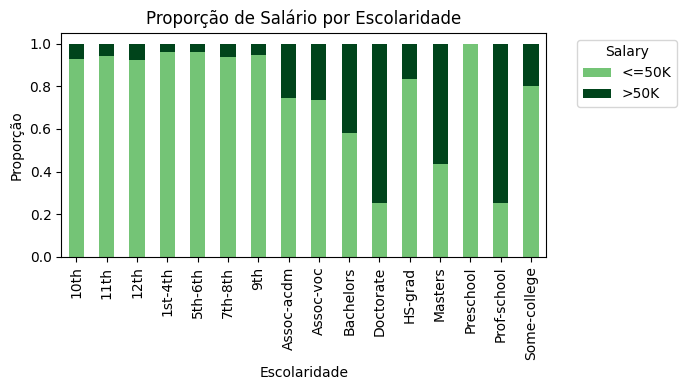

In [15]:
prop_education = pd.crosstab(df["education"], df["salary"], normalize="index")
    
ax = prop_education.plot(
    kind="bar",
    stacked=True,
    figsize=(7,4),
    color=["#74c476", "#00441b"] # verde claro e verde escuro
)
  
# mover legenda para fora
plt.legend(title="Salary", bbox_to_anchor=(1.05, 1), loc="upper left")
    
plt.title(f"Proporção de Salário por Escolaridade")
plt.ylabel("Proporção")
plt.xlabel("Escolaridade")
plt.tight_layout()
plt.show()

O gráfico mostra que quanto maior o nível de escolaridade, maior a renda (acima de 50K). Pós-graduação (Doctorate, Prof-school e Masters) concentra as maiores proporções de indivíduos que ganham mais que 50k, enquanto níveis mais baixos de ensino apresentam as menores.

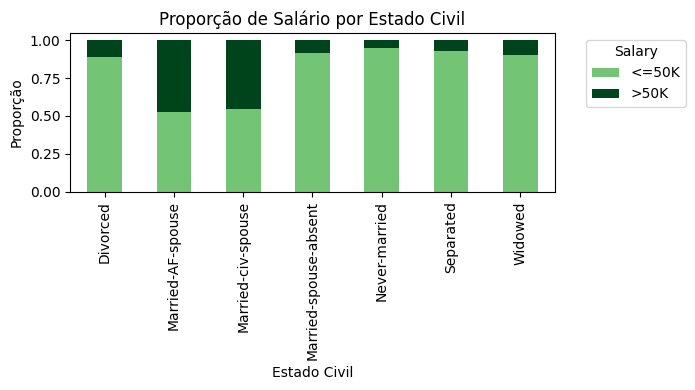

In [16]:
prop_marital = pd.crosstab(df["marital-status"], df["salary"], normalize="index")
    
ax = prop_marital.plot(
    kind="bar",
    stacked=True,
    figsize=(7,4),
    color=["#74c476", "#00441b"] # verde claro e verde escuro
)  
# mover legenda para fora
plt.legend(title="Salary", bbox_to_anchor=(1.05, 1), loc="upper left")
    
plt.title(f"Proporção de Salário por Estado Civil")
plt.ylabel("Proporção")
plt.xlabel("Estado Civil")
plt.tight_layout()
plt.show()

O gráfico indica que pessoas casadas têm maior proporção de renda acima de 50K, chegando perto de 50% do grupo. Já os solteiros, divorciados e viúvos possuem a maior parte em indivíduos que ganham menos que 50k.

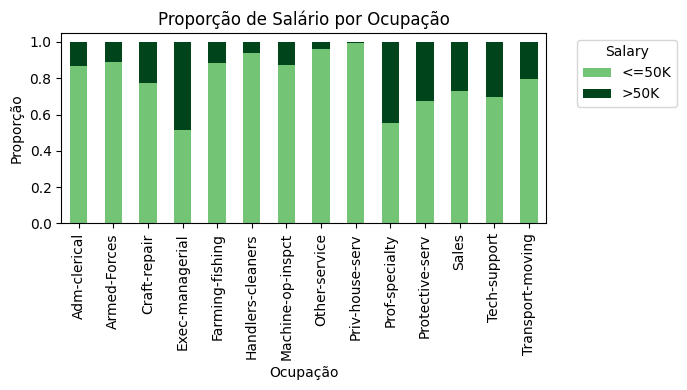

In [17]:
prop_occupation = pd.crosstab(df["occupation"], df["salary"], normalize="index")
    
ax = prop_occupation.plot(
    kind="bar",
    stacked=True,
    figsize=(7,4),
    color=["#74c476", "#00441b"] # verde claro e verde escuro
)
  
# mover legenda para fora
plt.legend(title="Salary", bbox_to_anchor=(1.05, 1), loc="upper left")
    
plt.title(f"Proporção de Salário por Ocupação")
plt.ylabel("Proporção")
plt.xlabel("Ocupação")
plt.tight_layout()
plt.show()

Cargos de gestão e especialização têm maior proporção de renda acima de 50K, enquanto serviços domésticos e trabalhos operacionais concentram as menores. Áreas técnicas e de proteção ficam em nível intermediário.

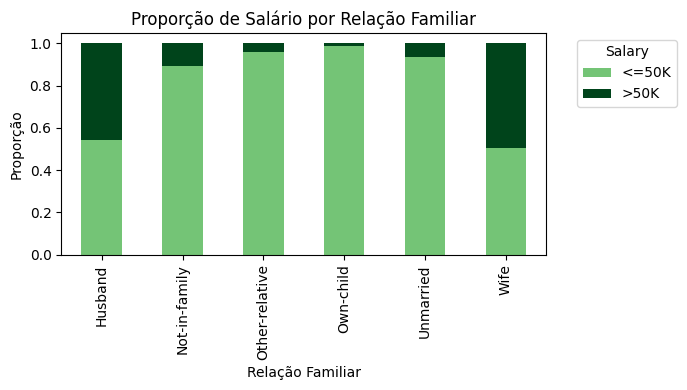

In [18]:
prop_relationship = pd.crosstab(df["relationship"], df["salary"], normalize="index")
    
ax = prop_relationship.plot(
    kind="bar",
    stacked=True,
    figsize=(7,4),
    color=["#74c476", "#00441b"] # verde claro e verde escuro
)
  
# mover legenda para fora
plt.legend(title="Salary", bbox_to_anchor=(1.05, 1), loc="upper left")
    
plt.title(f"Proporção de Salário por Relação Familiar")
plt.ylabel("Proporção")
plt.xlabel("Relação Familiar")
plt.tight_layout()
plt.show()

Observando a relação familiar nota-se que os principais grupos que ganham acima de 50k, com quase metade dos indivíduos nessa categoria, são esposas e maridos, em relaçao as outras categorias.

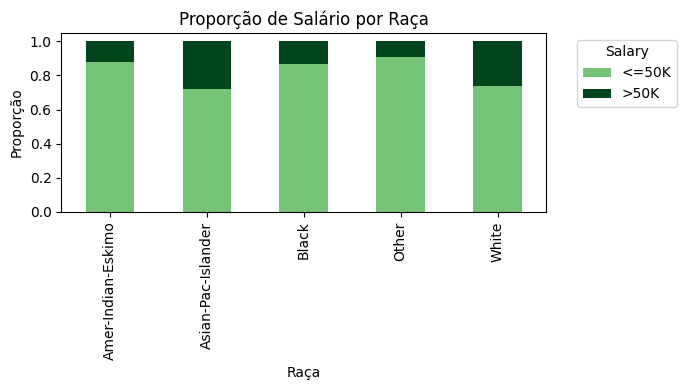

In [19]:
prop_race = pd.crosstab(df["race"], df["salary"], normalize="index")
    
ax = prop_race.plot(
    kind="bar",
    stacked=True,
    figsize=(7,4),
    color=["#74c476", "#00441b"] # verde claro e verde escuro
)  
# mover legenda para fora
plt.legend(title="Salary", bbox_to_anchor=(1.05, 1), loc="upper left")
    
plt.title(f"Proporção de Salário por Raça")
plt.ylabel("Proporção")
plt.xlabel("Raça")
plt.tight_layout()
plt.show()

Pessoas de raça branca e asiáticas possuem uma proporção maior de indivíduos que recebem acima de 50k em relação as outras reças.

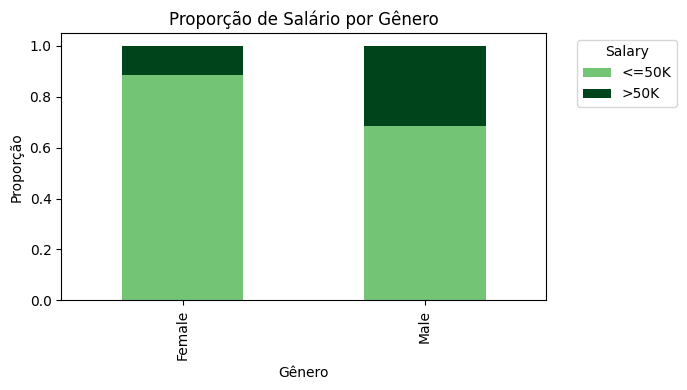

In [20]:
prop_sex = pd.crosstab(df["sex"], df["salary"], normalize="index")
    
ax = prop_sex.plot(
    kind="bar",
    stacked=True,
    figsize=(7,4),
    color=["#74c476", "#00441b"] # verde claro e verde escuro
)  
  
# mover legenda para fora
plt.legend(title="Salary", bbox_to_anchor=(1.05, 1), loc="upper left")
    
plt.title(f"Proporção de Salário por Gênero")
plt.ylabel("Proporção")
plt.xlabel("Gênero")
plt.tight_layout()
plt.show()

Observa-se que a proporção de pessoas que ganham mais do que 50k é maior no gênero masculino.

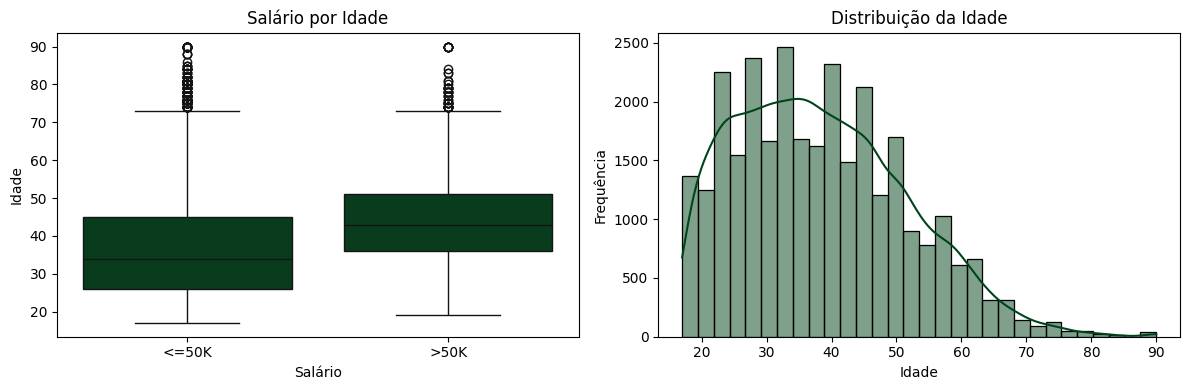

In [21]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Boxplot
sns.boxplot(data=df, x="salary", y="age", ax=axes[0], color = "#00441b")
axes[0].set_title("Salário por Idade")
axes[0].set_xlabel("Salário")
axes[0].set_ylabel("Idade")

# Histograma
sns.histplot(data=df, x="age", bins=30, kde=True, ax=axes[1], color = "#00441b", line_kws={"color": "#74c476" })
axes[1].set_title("Distribuição da Idade")
axes[1].set_xlabel("Idade")
axes[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()

Observa-se que quem ganha até 50K tem mediana em torno de 34 anos, enquanto o grupo que ganha mais de 50K tem mediana mais alta, por volta de 43–45 anos, indicando que pessoas mais velhas possuem salários maiores. No histograma, a maior parte das pessoas está entre 20 e 45 anos, com pico perto dos 35, e a distribuição é levemente assimétrica à direita, já que a frequência diminui depois dos 50 anos. Também há poucos indivíduos muito jovens ou acima dos 75 anos, mostrando que a base é composta principalmente por adultos em idade ativa.

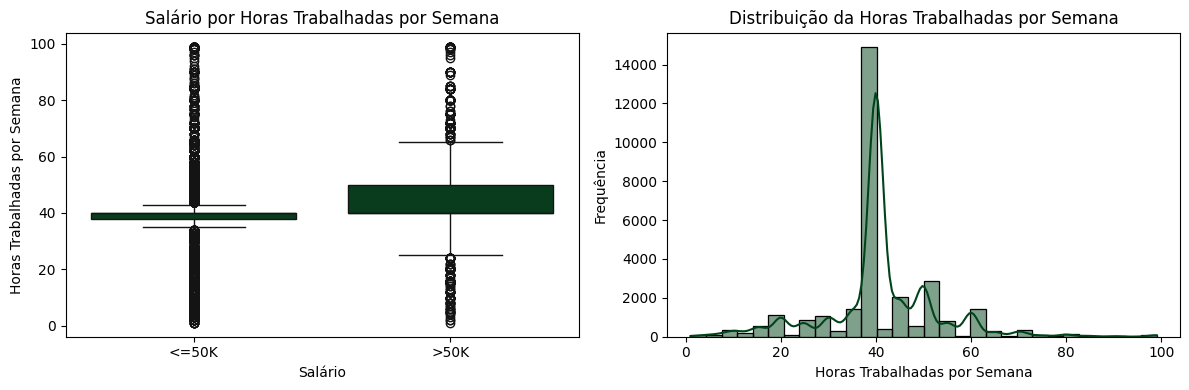

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Boxplot
sns.boxplot(data=df, x="salary", y="hours-per-week", ax=axes[0], color = "#00441b")
axes[0].set_title("Salário por Horas Trabalhadas por Semana")
axes[0].set_xlabel("Salário")
axes[0].set_ylabel("Horas Trabalhadas por Semana")

# Histograma
sns.histplot(data=df, x="hours-per-week", bins=30, kde=True, ax=axes[1], color = "#00441b", line_kws={"color": "#74c476" })
axes[1].set_title("Distribuição da Horas Trabalhadas por Semana")
axes[1].set_xlabel("Horas Trabalhadas por Semana")
axes[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()

As horas trabalhadas por semana mostram que quem ganha até 50K geralmente trabalha 40 horas, que é a jornada padrão, enquanto quem ganha mais de 50K costuma trabalhar um pouco mais, em torno de 44–45 horas. O histograma confirma que 40 horas é o grande pico da base, mas também existem grupos que fazem 45, 50 ou até 60 horas e uma parte menor que trabalha entre 10 e 30 horas.

In [23]:
(df["capital-loss"] == 0).mean()
# 4.73% das pessoas tiveram perda de capital 


np.float64(0.9526888137391419)

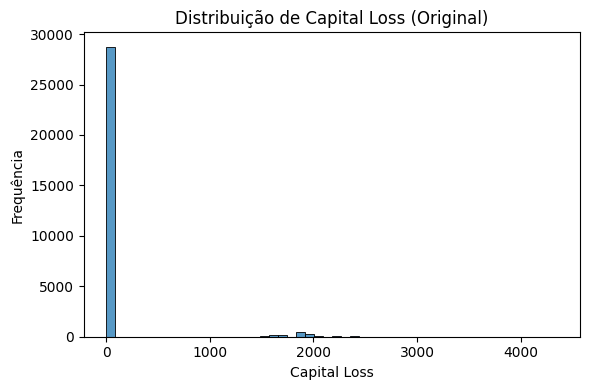

In [24]:

plt.figure(figsize=(6,4))
sns.histplot(df["capital-loss"], bins=50)

plt.title("Distribuição de Capital Loss (Original)")
plt.xlabel("Capital Loss")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

A variável capital-loss é bem desbalanceada, porque quase 95% dos valores são zero e só alguns casos têm perdas entre mais ou menos 1000 e 4500. Quando aplicamos log(1+x), esses valores maiores passam a ficar entre 7 e 8, o que diminui bastante o peso dos extremos. Isso ajuda principalmente modelos como Regressão Logística e SVM, que são mais sensíveis a valores muito altos, e também deixa o treino dos modelos de árvore, como Random Forest e Gradient Boosting, mais estável e equilibrado na hora de fazer as predições.

O mesmo foi feito para o capital-gain, que apresentou comportamento parecido.

In [25]:
df["capital_loss_log"] = np.log1p(df["capital-loss"])

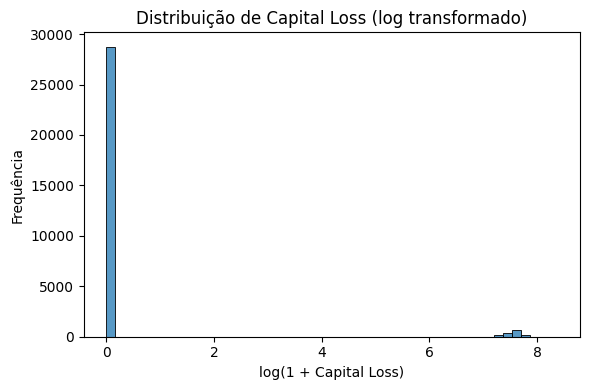

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df["capital_loss_log"], bins=50)

plt.title("Distribuição de Capital Loss (log transformado)")
plt.xlabel("log(1 + Capital Loss)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

In [27]:
(df["capital-gain"] == 0).mean()
# 9% tiveram ganho capital

np.float64(0.9158543863139049)

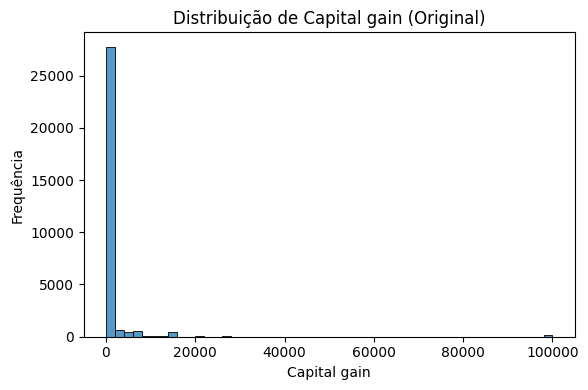

In [28]:

plt.figure(figsize=(6,4))
sns.histplot(df["capital-gain"], bins=50)

plt.title("Distribuição de Capital gain (Original)")
plt.xlabel("Capital gain")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

In [29]:
df["capital_gain_log"] = np.log1p(df["capital-gain"])

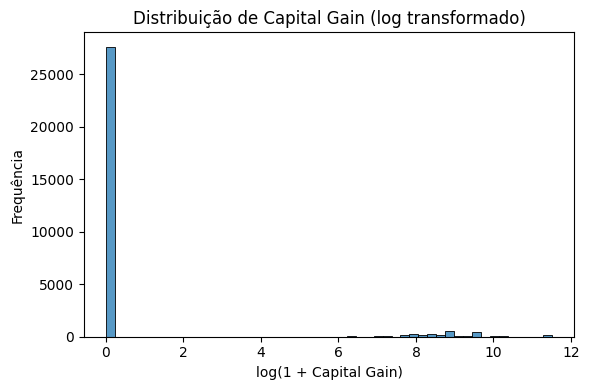

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(df["capital_gain_log"], bins=50)

plt.title("Distribuição de Capital Gain (log transformado)")
plt.xlabel("log(1 + Capital Gain)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

### Pré Processamento dos Dados

In [31]:
# Separação entre variáveis explicativas e alvo

X = df.drop("salary", axis=1)
y = df["salary"]

In [32]:
# Variáveis numéricas e categóricas

num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [33]:
# Transformação logaritimica das variaveis de capital

def log_transform(X):
    X = X.copy()
    X["capital-gain"] = np.log1p(X["capital-gain"])
    X["capital-loss"] = np.log1p(X["capital-loss"])
    return X

log_pipeline = FunctionTransformer(log_transform)

In [34]:
# Variáveis numéricas foram padronizadas com StandardScaler - Regressão Logistica e SVM - Modelos baseados em árvore não exigem escala, mas não são prejudicados por ela.
num_pipeline = Pipeline([
    ("log", log_pipeline), 
    ("scaler", StandardScaler())
])


In [35]:
# Codificação das Variáveis Categóricas

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

# O One-Hot Encoding cria colunas binárias para cada categoria.
# O parâmetro drop="first" evita multicolinearidade, enquanto handle_unknown="ignore" previne erros caso novas categorias apareçam no conjunto de teste.

In [36]:
# Combinação das Transformações

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])


### Divisão treino e teste

In [37]:
# semente fixa
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=SEED,
    stratify=y  # mantém proporção das classes
)

In [38]:
print("=== DIVISÃO DOS DADOS ===")
print(f"Total de observações: {len(X)}\n")

print(f"Treino: {len(X_train)} observações "
      f"({len(X_train)/len(X)*100:.2f}%)")

print(f"Teste: {len(X_test)} observações "
      f"({len(X_test)/len(X)*100:.2f}%)")


=== DIVISÃO DOS DADOS ===
Total de observações: 30162

Treino: 24129 observações (80.00%)
Teste: 6033 observações (20.00%)


In [39]:
# Definir k-fold
kfold = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=SEED
)

Foi utilizada validação cruzada do tipo k-fold, com 5 partições. Uma técnica que divide o conjunto de treino em k partes (folds) e treina o modelo k vezes, usando cada fold uma vez como validação. No final, a média dos resultados dá uma avaliação mais robusta do desempenho.

O StratifiedKFold é essencial para conjuntos de dados desbalanceados, como o de renda, pois garante que cada fold mantenha a proporção de classes original, evitando que algum fold fique sem exemplos de alta renda.

### Modelos

Os modelos propostos neste trabalho para prever a faixa de renda dos indivíduos são: Regressão Logística, Gradient Boosting, Random Forest (Floresta Aleatória) e SVM (Support Vector Machine). 

In [40]:
# Lista de Modelos Candidatos
models = [
    LogisticRegression(max_iter=1000, C=1.0, random_state=SEED),
    
    RandomForestClassifier(
        n_estimators=300, max_depth=20, min_samples_split=5, 
        min_samples_leaf=2, random_state=SEED
    ),
    
    GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=3, 
        min_samples_split=5, random_state=SEED
    ),
    
    SVC(kernel="rbf", C=1.0, probability=True, random_state=SEED)
]

log_cols = ["Model", "CV Accuracy", "CV F1-Score", "Std Dev"]
log = pd.DataFrame(columns=log_cols)

print("="*65)
print(f"{'Modelo':<25} | {'Acc Média':<10} | {'F1 Média':<10} | {'Std':<6}")
print("-" * 65)

for clf in models:
    name = clf.__class__.__name__
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", clf)
    ])
    
    # Executando a Validação Cruzada na "Arena" de Treino
    cv_results = cross_validate(
        pipeline, X_train, y_train, 
        cv=kfold, 
        scoring=['accuracy', 'f1_weighted'],
        n_jobs=-1
    )
    
    acc_mean = cv_results['test_accuracy'].mean()
    f1_mean = cv_results['test_f1_weighted'].mean()
    acc_std = cv_results['test_accuracy'].std()
    
    print(f"{name:<25} | {acc_mean:>10.2%} | {f1_mean:>10.2%} | {acc_std:.3f}")
    
    log.loc[len(log)] = [name, acc_mean, f1_mean, acc_std]

print("="*65)

#  Escolha do Melhor Modelo (Baseado no F1-Score)
best_model_name = log.sort_values(by="CV F1-Score", ascending=False).iloc[0]["Model"]
print(f"\nO modelo vencedor na validação foi: {best_model_name}")


Modelo                    | Acc Média  | F1 Média   | Std   
-----------------------------------------------------------------
LogisticRegression        |     83.99% |     83.44% | 0.002
RandomForestClassifier    |     86.02% |     85.28% | 0.003
GradientBoostingClassifier |     86.37% |     85.75% | 0.005
SVC                       |     85.17% |     84.50% | 0.004

O modelo vencedor na validação foi: GradientBoostingClassifier


O modelo apresentou 86% de acurácia, indicando que classificou corretamente a maioria dos indivíduos quanto à faixa de renda. No entanto, a base é desbalanceada, pois há muito mais pessoas que ganham até 50K do que acima de 50K. Isso significa que um modelo poderia ter uma acurácia alta apenas prevendo sempre a classe majoritária, sem realmente aprender a identificar corretamente quem possui renda alta.

Por isso, o F1-score (85%) é mais adequado nesse contexto, pois considera o equilíbrio entre precisão e recall. A precisão indica, dentre aqueles que o modelo classificou como renda >50K, quantos realmente pertencem a essa classe (evitando falsos positivos). Já o recall mede, dentre todos que realmente ganham >50K, quantos o modelo conseguiu identificar (evitando falsos negativos). O fato de o F1-score estar próximo da acurácia mostra que o modelo está equilibrado e consegue identificar bem ambas as classes.

Além disso, o baixo desvio padrão (0,005) demonstra que o desempenho é consistente em diferentes divisões dos dados, variando cerca de apenas 0,5%, o que reforça a estabilidade e confiabilidade do modelo para predição de renda.

In [41]:
# Melhor modelo
best_model = GradientBoostingClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=3, 
    min_samples_split=5, random_state=SEED
)

# 2. Aplicando dados treino
final_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", best_model)
])

final_pipeline.fit(X_train, y_train)

# 3. Predições
y_pred_train = final_pipeline.predict(X_train)
y_pred_test = final_pipeline.predict(X_test)

# 4. Comparação de Acurácia
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Acurácia Treino: {acc_train:.2%}")
print(f"Acurácia Teste:  {acc_test:.2%}")
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_test))

Acurácia Treino: 86.99%
Acurácia Teste:  86.28%

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      4531
        >50K       0.79      0.61      0.69      1502

    accuracy                           0.86      6033
   macro avg       0.84      0.78      0.80      6033
weighted avg       0.86      0.86      0.86      6033



Os resultados mostram que o modelo foi bem ajustado. A acurácia no treino (86,99%) e no teste (86,28%) são próximas, o que indica que não houve overfitting — ou seja, o modelo não decorou os dados, ele aprendeu padrões que generalizam bem para novos dados. 

O modelo tem desempenho diferente entre as classes:
- Para a classe ≤50K, ele apresenta precisão de 88% e recall de 95%, resultando em um F1-score de 0,91. Isso acontece porque essa é a classe majoritária (4531 casos), então o modelo tem mais exemplos para aprender. 
- Para a classe >50K (1502 casos), a precisão é 79%, o que significa que, quando o modelo prevê alta renda, ele geralmente está correto. Porém, o recall é 61%, indicando que ele deixa passar parte das pessoas que realmente ganham mais de 50K. 

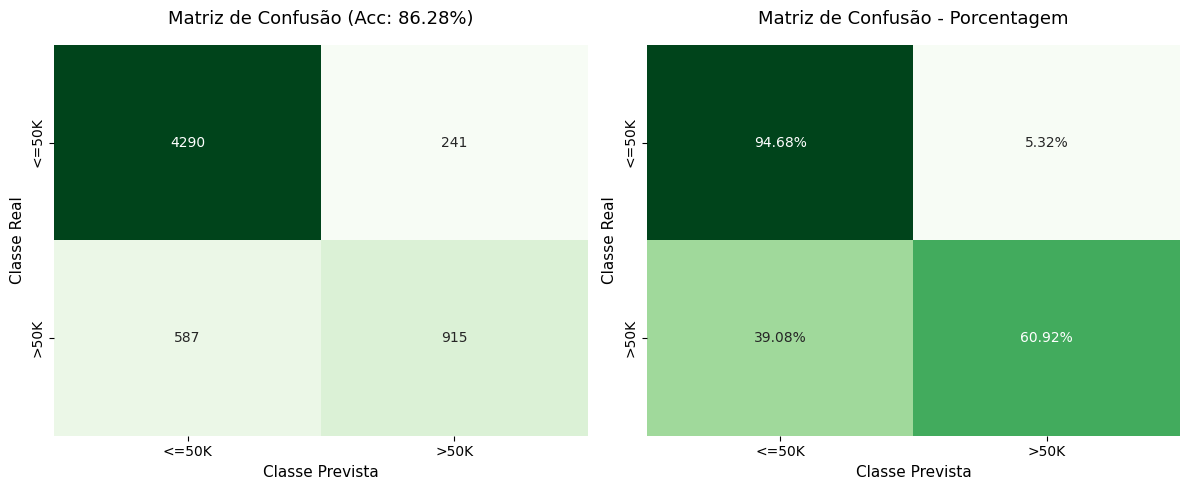

In [42]:
# 1. Matriz de confusão em números e porcentagem
cnf_matrix = confusion_matrix(y_test, y_pred_test)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

# 2. Criando DataFrames para plot (simplificando nomes para os eixos)
class_names = ['<=50K', '>50K']
df_cnf = pd.DataFrame(cnf_matrix, index=class_names, columns=class_names)
df_cnf_percent = pd.DataFrame(cnf_matrix_percent, index=class_names, columns=class_names)

# 3. Plot
plt.figure(figsize=(12, 5))

# Matriz de Números
plt.subplot(1, 2, 1)
sns.heatmap(df_cnf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title(f"Matriz de Confusão (Acc: {acc_test:.2%})", fontsize=13, pad=15)
plt.ylabel('Classe Real', fontsize=11)
plt.xlabel('Classe Prevista', fontsize=11)

# Matriz de Porcentagem
plt.subplot(1, 2, 2)
sns.heatmap(df_cnf_percent, annot=True, fmt='.2%', cmap='Greens', cbar=False)
plt.title("Matriz de Confusão - Porcentagem", fontsize=13, pad=15)
plt.ylabel('Classe Real', fontsize=11)
plt.xlabel('Classe Prevista', fontsize=11)

plt.tight_layout()
plt.show()


O modelo acerta muito bem quem ganha ≤50K (94,7%), mas tem mais dificuldade com quem ganha >50K (61%).

- Falsos positivos (5,3%): quase nunca “superestima” a renda, ou seja, raramente classifica alguém de baixa renda como rico.

- Falsos negativos (39%): perde parte dos clientes de alta renda, classificando-os como baixa renda.

Cenário no banco: possível perda de oportunidade para clientes que poderiam receber produtos Premium.

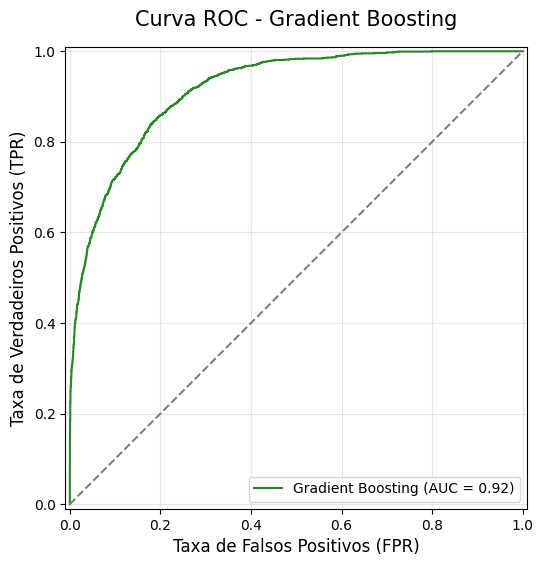

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotando a curva com a linha verde e nome na legenda
# O parâmetro 'color' define a cor da linha principal
roc_display = RocCurveDisplay.from_estimator(
    final_pipeline,
    X_test,
    y_test,
    name='Gradient Boosting',
    ax=ax,
    curve_kwargs={'color': 'forestgreen'}
)


# Adicionando a linha de referência (diagonal) em cinza tracejado
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

# Customizando as legendas em Português
ax.set_title("Curva ROC - Gradient Boosting", fontsize=15, pad=15)
ax.set_xlabel("Taxa de Falsos Positivos (FPR)", fontsize=12)
ax.set_ylabel("Taxa de Verdadeiros Positivos (TPR)", fontsize=12)

# Ajustando a legenda lateral
ax.legend(loc="lower right")

plt.grid(alpha=0.3)
plt.show()

A Curva ROC e o AUC são métricas que mostram o quão bem o modelo consegue separar quem ganha ≤50K de quem ganha >50K. O AUC, que neste caso é 0,92, indica que se pegarmos uma pessoa rica e uma pessoa de baixa renda aleatoriamente, o modelo atribuirá uma maior probabilidade de alta renda para a pessoa rica 92% das vezes.

### Importância das variáveis

In [47]:
# Acessar preprocessador ajustado
preprocessor_fitted = final_pipeline.named_steps["preprocess"]

# Separar transformadores
num_features = num_cols

cat_transformer = preprocessor_fitted.named_transformers_["cat"]
cat_features = cat_transformer.get_feature_names_out(cat_cols)

# Juntar todos os nomes
feature_names = np.concatenate([num_features, cat_features])

model = final_pipeline.named_steps["model"]
importances = model.feature_importances_

feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_importances.head(15)



,Feature,Importance
29,marital-status_Married-civ-spouse,0.388045
2,capital-gain,0.133188
6,capital_gain_log,0.090602
0,age,0.066521
4,hours-per-week,0.044037
42,occupation_Prof-specialty,0.039026
3,capital-loss,0.037743
21,education_Bachelors,0.035436
36,occupation_Exec-managerial,0.034415
5,capital_loss_log,0.031740


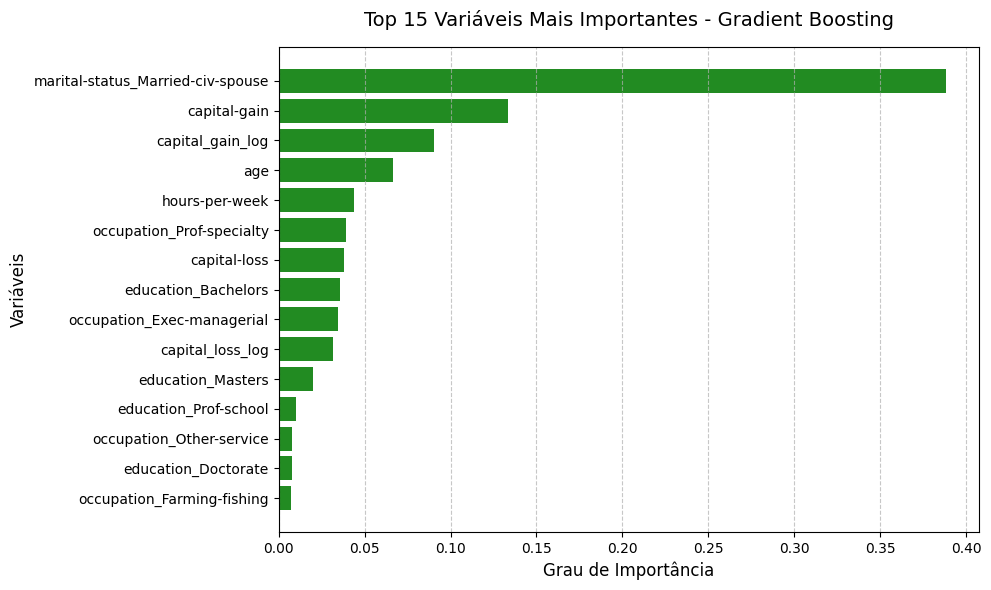

In [48]:
top_n = 15

# Configurando o estilo e a cor
plt.figure(figsize=(10, 6))

# Criando as barras na cor verde
# O parâmetro [::-1] inverte a ordem para a mais importante ficar no topo
plt.barh(
    feat_importances["Feature"].head(top_n)[::-1],
    feat_importances["Importance"].head(top_n)[::-1],
    color='forestgreen'
)

# Adicionando títulos e rótulos em português
plt.title(f"Top {top_n} Variáveis Mais Importantes - Gradient Boosting", fontsize=14, pad=15)
plt.xlabel("Grau de Importância", fontsize=12)
plt.ylabel("Variáveis", fontsize=12)

# Adicionando uma grade suave apenas no eixo X para facilitar a comparação
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustando o layout para não cortar os nomes das variáveis
plt.tight_layout()
plt.show()


O modelo Gradient Boosting mostra quais variáveis são mais importantes para prever quem ganha mais de $50K por ano: 

- Estado civil: pessoas casadas civilmente;

- Ganhos e perdas de capital: pessoas que investem em ações, imóveis ou outros ativos;

- Idade e horas trabalhadas por semana: pessoas mais experientes e que dedicam mais tempo ao trabalho;

- Educação e ocupação: Cargos de especialista e gerência  e níveis de escolaridade mais altos;

Variáveis como raça, país de origem ou o peso amostral têm pouca relevância.

Assim, o perfil típico de alta renda é formado por uma combinação de estabilidade civil, investimentos, educação, experiência e cargo.